<a href="https://colab.research.google.com/github/khaliil/Khaliil-Bouda-Analytics-Portfolio/blob/main/mnist_digit_classification_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Deep Learning in Keras: MNIST Digit Classification

By Khaliil Bouda

### Project Overview
This project classifies handwritten digits from the MNIST dataset using deep learning with Keras. The goal was to build, train, and evaluate a neural network model to accurately classify digits (0–9), and experiment with configurations to improve performance.

### Key Steps

1. **Data Loading & Exploration**  
   Loaded the MNIST dataset using Keras, displaying rows of training images based on user input.

2. **Preprocessing**  
   Normalized pixel values to [0, 1] and split data into training and validation sets.

3. **Model Building**  
   Built a neural network using Keras with an input layer, one dense hidden layer (with `relu` activation), and a softmax output layer.

4. **Experimentation**  
   Tested different configurations (e.g., number of units, activation functions, batch size, epochs) to improve validation accuracy.

5. **Training**  
   Compiled the model using a loss function (`sparse_categorical_crossentropy`) and trained it, monitoring accuracy and loss.

6. **Evaluation**  
   Used the best model configuration to evaluate performance on the test set and reported metrics.

7. **Visualization**  
   Prompted the user to review test images, visualizing true and predicted labels with prediction probabilities using `ipywidgets`.

### Conclusion
Analyzed the model’s performance, offering insights into prediction strengths.

In [ ]:
#read digits MNist dataset
from tensorflow import keras

(data_train, out_train), (data_test, out_test) = keras.datasets.mnist.load_data(path="mnist.npz")

data_train.shape, out_train.shape, data_test.shape, out_test.shape

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

## Preprocessing

In [ ]:
#transformation
in_train = data_train / 255.0
in_test = data_test / 255.0
in_train.min(), in_train.max(), in_test.min(), in_test.max()

(0.0, 1.0, 0.0, 1.0)

In [ ]:
#class names dictionary
class_names = {
    0: 'Zero',
    1: 'One',
    2: 'Two',
    3: 'Three',
    4: 'Four',
    5: 'Five',
    6: 'Six',
    7: 'Seven',
    8: 'Eight',
    9: 'Nine'
}
print(class_names)

{0: 'Zero', 1: 'One', 2: 'Two', 3: 'Three', 4: 'Four', 5: 'Five', 6: 'Six', 7: 'Seven', 8: 'Eight', 9: 'Nine'}


## Training Set

In [ ]:
#define function to display images
import math
import matplotlib.pyplot as plt

#this function plots a grid of images along with their true labels
#if thepredicted labels are provided, it also displays the predicted labels below the images.
def plot(images, labels, predictions=None):
  n_cols = min(10, len(images))
  n_rows = math.ceil(len(images) / n_cols)
  fig, axes = plt.subplots(n_rows, n_cols, figsize = (n_cols + 3, n_rows + 2))
  if predictions is None:
    predictions = [None] * len(labels)
  for index, (image, label, label_pred) in enumerate(zip(images, labels, predictions)):
    ax = axes.flat[index]
    ax.imshow(image, cmap=plt.cm.binary)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(class_names[label])
    if label_pred is not None:
      ax.set_xlabel(class_names[label_pred])




How many rows of training images (in 10 images per row) would you like to review?: 10


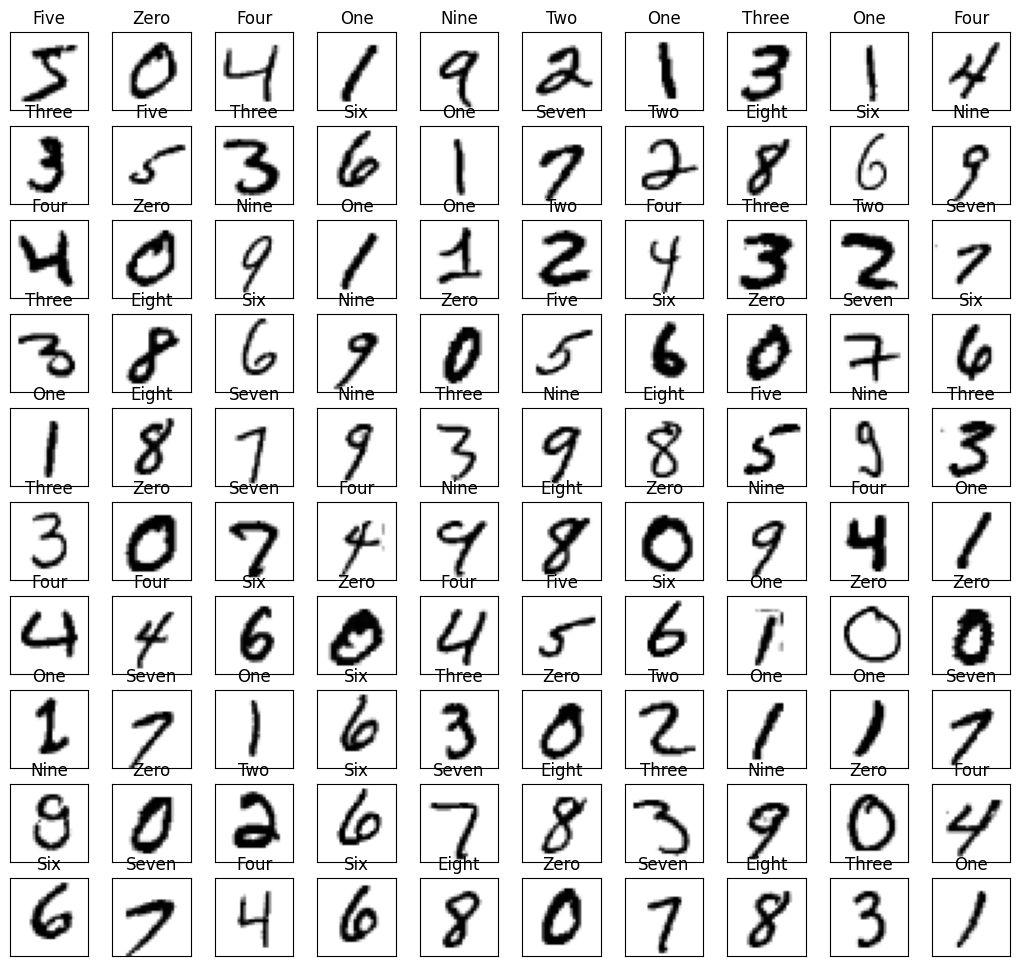

In [ ]:
#these lines of code prompt the user the number of rows they want to display
user_nrows = int(input("How many rows of training images (in 10 images per row) would you like to review?: "))
plot(in_train[:user_nrows*10], out_train[:user_nrows*10])

## Model in Keras

In [ ]:
#ACT 11 code
model = keras.Sequential(layers = [
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.Dense(500, activation = 'sigmoid'),
    keras.layers.Dense(10, activation = 'softmax')
] # https://www.tensorflow.org/api_docs/python/tf/keras/Model
  # https://keras.io/api/optimizers/
)

model.compile(optimizer = 'adam',
              loss ='sparse_categorical_crossentropy',
              metrics = ['accuracy'])
model.fit(in_train, out_train, batch_size=60, epochs=2, validation_split=0.2)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/2
800/800 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.8247 - loss: 0.6528 - val_accuracy: 0.9280 - val_loss: 0.2514
Epoch 2/2
800/800 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9286 - loss: 0.2433 - val_accuracy: 0.9442 - val_loss: 0.1940


In [ ]:
#model with increased number of units and different activation
model1 = keras.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.Dense(700, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])#https://keras.io/api/layers/activation_layers/relu/


model1.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model1.fit(in_train, out_train, batch_size=60, epochs=2, validation_split=0.2)


Epoch 1/2
800/800 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.8792 - loss: 0.4084 - val_accuracy: 0.9620 - val_loss: 0.1295
Epoch 2/2
800/800 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.9711 - loss: 0.0990 - val_accuracy: 0.9687 - val_loss: 0.0989


In [ ]:
#changed activation function
model2 = keras.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.Dense(500, activation='tanh'),
    keras.layers.Dense(10, activation='softmax')
])#https://keras.io/api/layers/activations/


model2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


model2.fit(in_train, out_train, batch_size=60, epochs=2, validation_split=0.2)


Epoch 1/2
800/800 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.8656 - loss: 0.4564 - val_accuracy: 0.9427 - val_loss: 0.2045
Epoch 2/2
800/800 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9499 - loss: 0.1708 - val_accuracy: 0.9578 - val_loss: 0.1458


In [ ]:
#changed batch size
model3 = keras.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.Dense(500, activation='sigmoid'),
    keras.layers.Dense(10, activation='softmax')
])


model3.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


model3.fit(in_train, out_train, batch_size=128, epochs=2, validation_split=0.2)


Epoch 1/2
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.7869 - loss: 0.8295 - val_accuracy: 0.9187 - val_loss: 0.2841
Epoch 2/2
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.9200 - loss: 0.2792 - val_accuracy: 0.9337 - val_loss: 0.2341


In [ ]:
#increased epoch and different optimizer
model4 = keras.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.Dense(500, activation='sigmoid'),
    keras.layers.Dense(10, activation='softmax')
])


model4.compile(optimizer='rmsprop',#https://keras.io/api/optimizers/rmsprop/
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


model4.fit(in_train, out_train, batch_size=60, epochs=5, validation_split=0.2)


Epoch 1/5
800/800 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.8234 - loss: 0.6602 - val_accuracy: 0.9256 - val_loss: 0.2621
Epoch 2/5
800/800 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.9228 - loss: 0.2642 - val_accuracy: 0.9428 - val_loss: 0.2034
Epoch 3/5
800/800 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9433 - loss: 0.1949 - val_accuracy: 0.9502 - val_loss: 0.1716
Epoch 4/5
800/800 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.9541 - loss: 0.1515 - val_accuracy: 0.9607 - val_loss: 0.1366
Epoch 5/5
800/800 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.9652 - loss: 0.1217 - val_accuracy: 0.9629 - val_loss: 0.1268


In [ ]:
# in this model we changed the validation split
model5 = keras.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.Dense(500, activation='sigmoid'),
    keras.layers.Dense(10, activation='softmax')
])

model5.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


model5.fit(in_train, out_train, batch_size=60, epochs=2, validation_split=0.3)


Epoch 1/2
700/700 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.8136 - loss: 0.7095 - val_accuracy: 0.9163 - val_loss: 0.2824
Epoch 2/2
700/700 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9252 - loss: 0.2550 - val_accuracy: 0.9361 - val_loss: 0.2240


## Model Accuracies

* model1 = 0.9704
* model2 = 0.9597
* model3 = 0.9333
* model4 = 0.9651
* model5 = 0.9380

The model with the highest accuraccy is Model 1 with a validation accuracy of 0.97.

In [ ]:

model1.evaluate(in_test, out_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9698 - loss: 0.1068


[0.09129571169614792, 0.9731000065803528]

In [ ]:
probs = model1.predict(in_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [ ]:
preds = probs.argmax(axis=1)
preds

array([7, 2, 1, ..., 4, 5, 6])

How many rows of training images (in 10 images per row) would you like to review?: 10


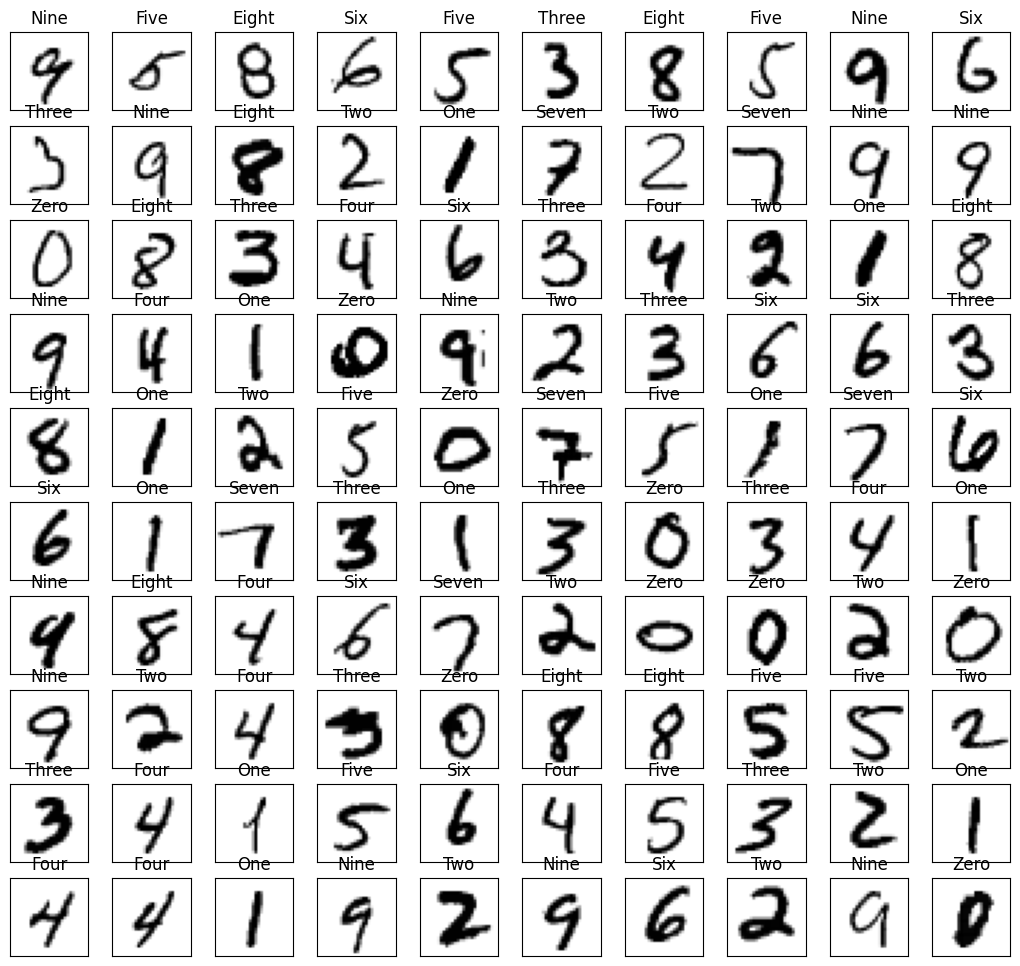

In [ ]:
import numpy as np

#this chunk prompts the user and randomly selects indices from the test dataset and plots them
user_nrows = int(input("How many rows of training images (in 10 images per row) would you like to review?: "))

# Randomly select indices from the test dataset
idx = np.random.choice(len(in_test), size=user_nrows * 10, replace=False)
selected_img = in_test[idx]
selected_labs = out_test[idx]

plot(selected_img, selected_labs)
plt.show()



## Application

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import widgets, interact, Layout
img_idx_slider = widgets.IntSlider(value=0, min=0, max=len(in_test) - 1,
                                   description='Image Index',
                                   layout=Layout(width='100%'))

#this code creates an interactive visualization using IPython widgets
#it displays an image from the MNIST test dataset along with its true label
@interact(index=img_idx_slider)
def visualize_prediction(index=0):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
    ax1.imshow(in_test[index], cmap=plt.cm.binary)
    ax1.set_title(f'Label: {class_names[out_test[index]]}')
    ax1.xaxis.tick_top()
    ax1.set_xlabel(f'Predict: {class_names[preds[index]]}')
    ax1.set_ylabel('Pixel Location Index')
    ax1.set_xticks(range(28))
    ax1.set_yticks(range(28))
    ax1.tick_params(axis='x', labelrotation=90)
    bar = sns.barplot(y=[class_names[ind] for ind in range(10)],
                      x=probs[index]*100)
    bar.set_xlim(0, 100)
    bar.set_xlabel('Probability (%)')
    bar.set_ylabel('Prediction Label')
    bar.set_title('Prediction Probabilities')
    fig.tight_layout()
    plt.show()

interactive(children=(IntSlider(value=0, description='Image Index', layout=Layout(width='100%'), max=9999), Ou…